
================ SAMPLE DATA =================
show_id    type                 title       country  release_year                                                     listed_in
     s1   Movie  Dick Johnson Is Dead United States          2020                                                 Documentaries
     s2 TV Show         Blood & Water  South Africa          2021               International TV Shows, TV Dramas, TV Mysteries
     s3 TV Show             Ganglands           NaN          2021 Crime TV Shows, International TV Shows, TV Action & Adventure
     s4 TV Show Jailbirds New Orleans           NaN          2021                                        Docuseries, Reality TV
     s5 TV Show          Kota Factory         India          2021        International TV Shows, Romantic TV Shows, TV Comedies

================ TOP 10 GENRES =================
                          Count
listed_in                      
International Movies       2752
Dramas                     2427
Comedi

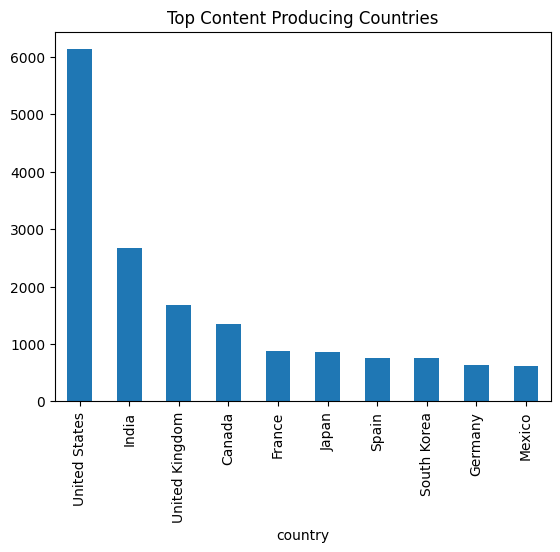

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ---------------- DISPLAY SETTINGS ----------------
pd.set_option("display.width", 120)
pd.set_option("display.max_colwidth", 30)

# ---------------- LOAD DATASET ----------------
df = pd.read_csv("netflix_titles.csv")

# ---------------- SAMPLE DATA ----------------
print("\n================ SAMPLE DATA =================")
sample_cols = ['show_id', 'type', 'title', 'country', 'release_year', 'listed_in']
print(df[sample_cols].head(5).to_string(index=False))

# --------------------------------------------------
# 1. Top 10 Most Frequent Genres
# --------------------------------------------------
genres = df['listed_in'].dropna().str.split(', ')
genres_exploded = genres.explode()
top_10_genres = genres_exploded.value_counts().head(10)

print("\n================ TOP 10 GENRES =================")
print(top_10_genres.to_frame(name="Count").to_string())

plt.figure()
top_10_genres.plot(kind='bar', title='Top 10 Most Frequent Genres')
plt.xlabel("Genre")
plt.ylabel("Count")

# --------------------------------------------------
# 2. Movies vs TV Shows Distribution
# --------------------------------------------------
movies_vs_tv = df['type'].value_counts()

print("\n============= MOVIES vs TV SHOWS ==============")
print(movies_vs_tv.to_frame(name="Count").to_string())

plt.figure()
movies_vs_tv.plot(kind='bar', title='Movies vs TV Shows Distribution')
plt.xlabel("Type")
plt.ylabel("Count")

# --------------------------------------------------
# 3. Content Added Per Year
# --------------------------------------------------
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
content_per_year = df['year_added'].value_counts().sort_index()

print("\n============= CONTENT ADDED PER YEAR =============")
print(content_per_year.to_frame(name="Titles Added").to_string())

plt.figure()
content_per_year.plot(kind='line', title='Content Added Per Year')
plt.xlabel("Year")
plt.ylabel("Titles Added")

# --------------------------------------------------
# 4. Country Producing Most Content
# --------------------------------------------------
countries = df['country'].dropna().str.split(', ')
countries_exploded = countries.explode()
top_country = countries_exploded.value_counts().head(10)

print("\n=========== TOP CONTENT PRODUCING COUNTRIES ===========")
print(top_country.to_frame(name="Count").to_string())

plt.figure()
top_country.plot(kind='bar', title='Top Content Producing Countries')
plt.xlabel("Country")
plt.ylabel("Count")

# ---------------- SHOW ALL GRAPHS ----------------
plt.show()
